In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataset = pd.read_csv('./datasets/pima-indians-diabetes.csv')

In [3]:
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
dataset.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

#### cleaning the data

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
dataset[cols_to_norm] = dataset[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### Feature Columns

In [8]:
import tensorflow as tf

### Continuous Features
- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function

In [9]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [10]:
#Categorical Features

assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

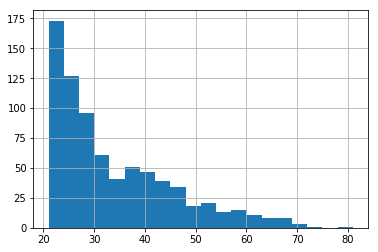

In [11]:
dataset['Age'].hist(bins=20)

In [12]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [13]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_bucket]

In [14]:
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [16]:
x_data = dataset.drop('Class',axis=1)

In [17]:
y_data = dataset['Class']

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.25,random_state=0)

In [33]:
#Input function
input_fn = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [34]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sumit\\AppData\\Local\\Temp\\tmp1zuf4xl8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000185D59C6978>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [35]:
model.train(input_fn=input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sumit\AppData\Local\Temp\tmp1zuf4xl8\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 248.478
INFO:tensorflow:loss = 4.5993805, step = 101 (0.402 sec)
INFO:tensorflow:global_step/sec: 454.511
INFO:tensorflow:loss = 5.232639, step = 201 (0.228 sec)
INFO:tensorflow:global_step/sec: 409.658
INFO:tensorflow:loss = 4.977019, step = 301 (0.240 sec)
INFO:tensorflow:global_step/sec: 423.496
INFO:tensorflow:loss = 5.163303, step = 401 (0.237 sec)
INFO:tensorflow:global_step/sec: 374.61
INFO:tensorflow:loss = 6.342401, step = 501 (0.265 sec)
INFO:tensorflow:global_step/sec: 459.359
INFO:tensorflow:loss = 3.887257, step = 601 (0.224 sec)
INFO:tensorflow:global_step/sec: 34

In [36]:
test_input_fn = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [37]:
results = model.evaluate(test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-19-06:48:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sumit\AppData\Local\Temp\tmp1zuf4xl8\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-19-06:48:48
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7447917, accuracy_baseline = 0.6770834, auc = 0.75831264, auc_precision_recall = 0.6277339, average_loss = 0.5316008, global_step = 1000, label/mean = 0.32291666, loss = 5.1033673, precision = 0.6756757, prediction/mean = 0.327648, recall = 0.4032258
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\sumit\AppData\Local\Temp\tmp1zuf4xl8\model.ckpt-1000


In [38]:
results

{'accuracy': 0.7447917,
 'accuracy_baseline': 0.6770834,
 'auc': 0.75831264,
 'auc_precision_recall': 0.6277339,
 'average_loss': 0.5316008,
 'label/mean': 0.32291666,
 'loss': 5.1033673,
 'precision': 0.6756757,
 'prediction/mean': 0.327648,
 'recall': 0.4032258,
 'global_step': 1000}

#### Predictions

In [39]:
pred_input_fn = tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)

In [40]:
#predictions is a generator ans list(predictions) will return a list of dictionary
#having a predictions key which has an array stored in it

predictions = model.predict(pred_input_fn)

In [41]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sumit\AppData\Local\Temp\tmp1zuf4xl8\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.0946908], dtype=float32),
  'logistic': array([0.52365506], dtype=float32),
  'probabilities': array([0.476345  , 0.52365506], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.2812164], dtype=float32),
  'logistic': array([0.21734326], dtype=float32),
  'probabilities': array([0.7826568 , 0.21734324], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.8509631], dtype=float32),
  'logistic': array([0.13575986], dtype=float32),
  'probabilities': array([0.86424017, 0.13575986], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([1.0372171], dtype=float32),
  'logistic': array([0.73831266], dtype=float32),
  'probabilities': array([0.2616873 , 0.73831266], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits'

In [42]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sumit\\AppData\\Local\\Temp\\tmpju3pxnj1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000185D5B99BA8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [45]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [47]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_bucket]

In [50]:
input_fn = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [54]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sumit\\AppData\\Local\\Temp\\tmp2w29wm25', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000185D734E828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [55]:
dnn_model.train(input_fn=input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sumit\AppData\Local\Temp\tmp2w29wm25\model.ckpt.
INFO:tensorflow:loss = 6.4725056, step = 1
INFO:tensorflow:global_step/sec: 261.068
INFO:tensorflow:loss = 6.2022953, step = 101 (0.383 sec)
INFO:tensorflow:global_step/sec: 526.862
INFO:tensorflow:loss = 7.693201, step = 201 (0.201 sec)
INFO:tensorflow:global_step/sec: 449.917
INFO:tensorflow:loss = 5.8202553, step = 301 (0.216 sec)
INFO:tensorflow:global_step/sec: 505.275
INFO:tensorflow:loss = 4.108301, step = 401 (0.214 sec)
INFO:tensorflow:global_step/sec: 438.918
INFO:tensorflow:loss = 3.0478892, step = 501 (0.210 sec)
INFO:tensorflow:global_step/sec: 492.96
INFO:tensorflow:loss = 4.783235, step = 601 (0.205 sec)
INFO:tensorflow:global_step/sec:

In [56]:
test_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=x_test,
    y=y_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False)

In [ ]:
dnn_model.evaluate(test_input_fn)